## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [1]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

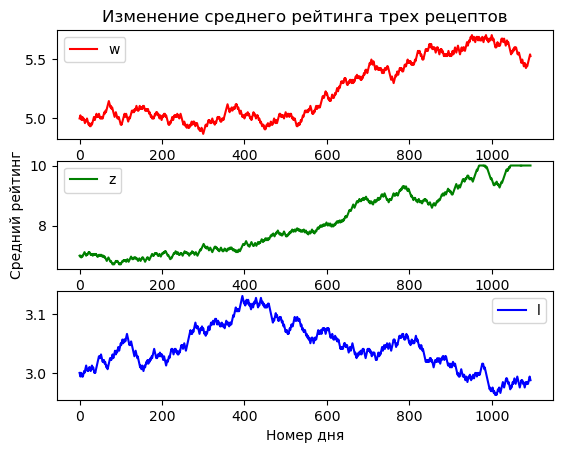

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ratings = np.load('average_ratings.npy')
ratings

x = []
for i in range(len(ratings[0])):
    x.append(i)

fig, ax = plt.subplots(nrows= 3 , ncols= 1)

ax[0].set_title('Изменение среднего рейтинга трех рецептов')
ax[0].plot(x, ratings[0], 'r')
ax[0].set_xlabel('Номер дня')
ax[0].legend('waffle iron french toast')
ax[1].plot(x, ratings[1], 'g')
ax[1].set_xlabel('Номер дня')
ax[1].set_ylabel('Средний рейтинг')
ax[1].legend('zwetschgenkuchen bavarian plum cake')
ax[2].plot(x, ratings[2], 'b')
ax[2].set_xlabel('Номер дня')
ax[2].legend('lime tea')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


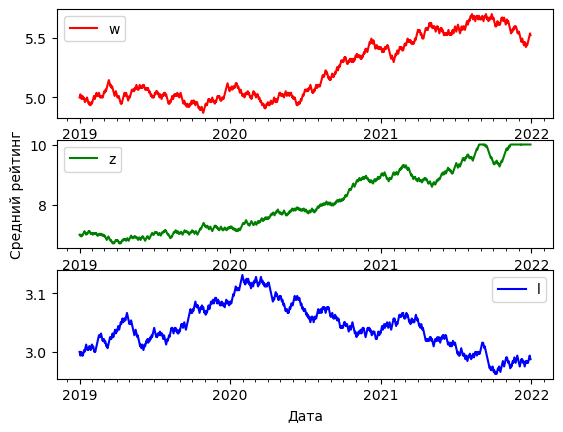

In [44]:
import matplotlib.dates as mdates
z = pd.date_range(start = '01.01.2019',end = '30.12.2021')
fig, axs = plt.subplots(nrows= 3 , ncols= 1)
axs[0].plot(z, ratings[0], 'r')
axs[1].plot(z, ratings[1], 'g')
axs[2].plot(z, ratings[2], 'b')
axs[1].set_ylabel('Средний рейтинг')
axs[0].legend('waffle iron french toast')
axs[1].legend('zwetschgenkuchen bavarian plum cake')
axs[2].legend('lime tea')
# common to all three:
for ax in axs:
    # Major ticks every half year, minor ticks every month,
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 1)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.set_xlabel('Дата')
 

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

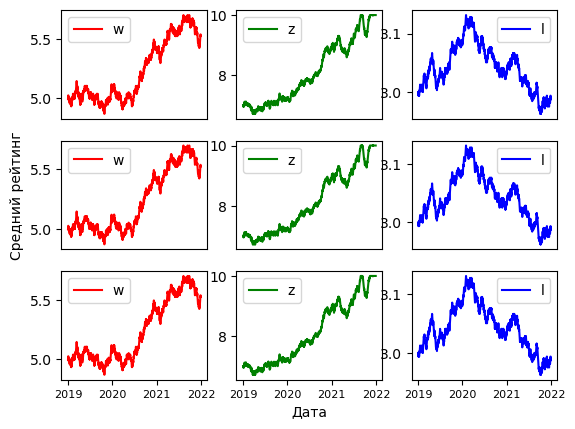

In [72]:
fig, axs = plt.subplots(nrows= 3 , ncols= 3)
axs[0][0].plot(z, ratings[0], 'r')
axs[0][0].get_xaxis().set_visible(False)
axs[0][0].legend('waffle iron french toast')
axs[1][0].plot(z, ratings[0], 'r')
axs[1][0].get_xaxis().set_visible(False)
axs[1][0].legend('waffle iron french toast')
axs[2][0].plot(z, ratings[0], 'r')
axs[2][0].legend('waffle iron french toast')
axs[0][1].plot(z, ratings[1], 'g')
axs[0][1].get_xaxis().set_visible(False)
axs[0][1].legend('zwetschgenkuchen bavarian plum cake')
axs[1][1].plot(z, ratings[1], 'g')
axs[1][1].get_xaxis().set_visible(False)
axs[1][1].legend('zwetschgenkuchen bavarian plum cake')
axs[2][1].plot(z, ratings[1], 'g')
axs[2][1].legend('zwetschgenkuchen bavarian plum cake')
axs[0][2].plot(z, ratings[2], 'b')
axs[0][2].get_xaxis().set_visible(False)
axs[0][2].legend('lime tea')
axs[1][2].plot(z, ratings[2], 'b')
axs[1][2].get_xaxis().set_visible(False)
axs[1][2].legend('lime tea')
axs[2][2].plot(z, ratings[2], 'b')
axs[2][2].legend('lime tea')
axs[1][0].set_ylabel('Средний рейтинг')
axs[2][1].set_xlabel('Дата')
axs[2][0].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 1)))
axs[2][0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[2][0].tick_params(axis="x", labelsize=8)
axs[2][1].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 1)))
axs[2][1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[2][1].tick_params(axis="x", labelsize=8)
axs[2][2].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 1)))
axs[2][2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[2][2].tick_params(axis="x", labelsize=8)

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [75]:
data1= pd.read_csv('recipes_sample.csv', sep = ',')
data2 = pd.read_csv('reviews_sample.csv', sep = ',')

recipes = pd.DataFrame(data1)
reviews = pd.DataFrame(data2)

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

Text(0.5, 1.0, 'Размеры групп рецептов')

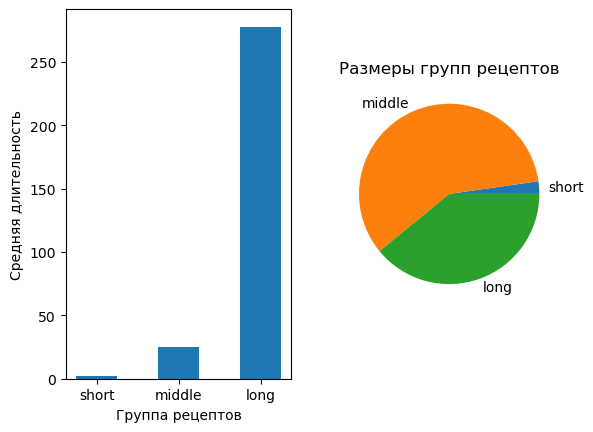

In [92]:
from statistics import mean

recipes
time_list = recipes['minutes'].to_list()
short = []
middle = []
long = [] 

for i in range(len(time_list)):
    if time_list[i] < 5:
        short.append(time_list[i])
    elif time_list[i] >= 5 and time_list[i] < 50:
        middle.append(time_list[i])
    if time_list[i] >= 50:
        long.append(time_list[i])
        

middle_mean = mean(middle)
short_mean = mean(short)
long_mean = mean(long)

dict1 = {'short' : short_mean, 'middle' : middle_mean, 'long' : long_mean,}
names = list(dict1.keys())
values = list(dict1.values())
len_names = [len(short), len(middle), len(long)]

fig, axs = plt.subplots(1 , ncols= 2)
axs[0].bar(names, values, width = 0.5)
axs[0].set_xlabel('Группа рецептов')
axs[0].set_ylabel('Средняя длительность')
axs[1].pie(len_names, labels = names)
axs[1].set_title('Размеры групп рецептов')


6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

(array([  656.,     0.,   148.,     0.,   199.,     0.,   594.,     0.,
         2742., 13333.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

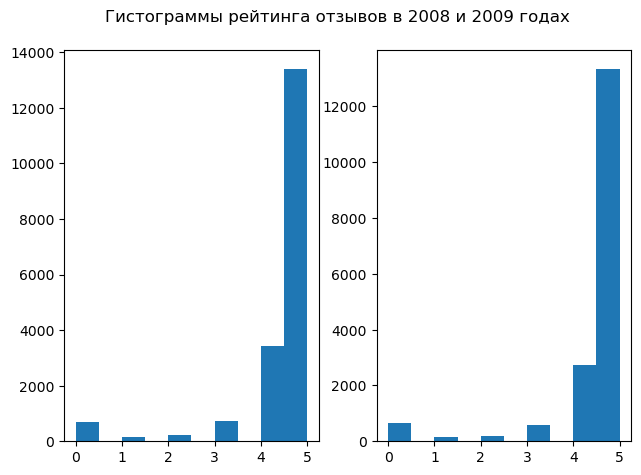

In [125]:
import datetime
date = reviews['date'].tolist()
rating = reviews['rating'].tolist()
date_list = []
for i in range(len(date)):
    date_list.append(datetime.datetime.strptime(date[i], '%Y-%m-%d'))
date2008 = []
rating2008 = []
date2009 = []
rating2009 = []

for i in range(len(date_list)):
    if date_list[i].year == 2008:
        rating2008.append(rating[i])
        date2008.append(date_list[i])
    elif date_list[i].year == 2009:
        rating2009.append(rating[i])
        date2009.append(date_list[i])
rating2008
fig, axs = plt.subplots(ncols = 2)
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
fig.tight_layout()
axs[0].hist(rating2008)
axs[1].hist(rating2009)

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

[Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')]

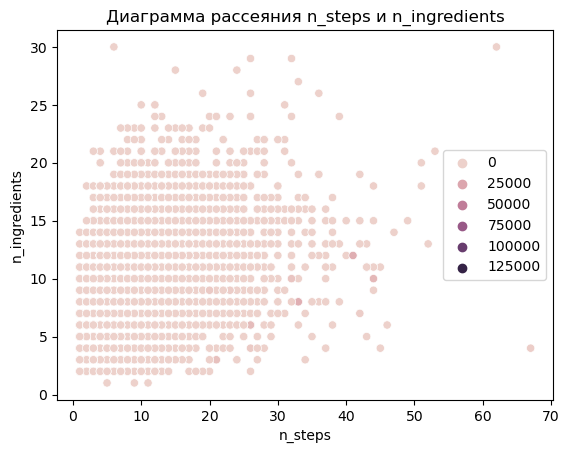

In [141]:
sns.scatterplot(data=recipes, x="n_steps", y="n_ingredients", hue = time_list).set(title = 'Диаграмма рассеяния n_steps и n_ingredients')


8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

[Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')]

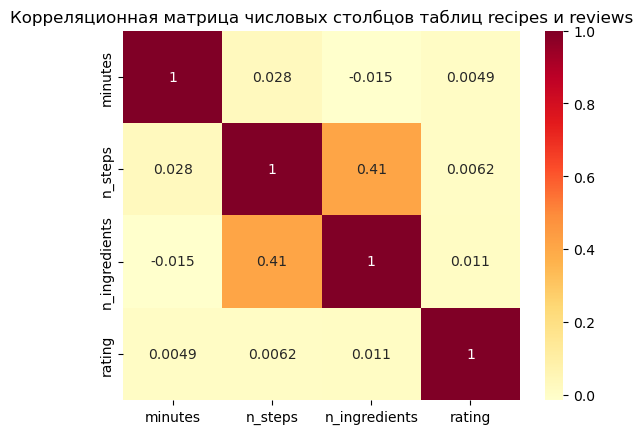

In [151]:
df = recipes.join(reviews)
df_new = pd.DataFrame(df, columns = ['minutes', 'n_steps', 'n_ingredients', 'rating'])
sns.heatmap(df_new.corr(), annot = True, cmap = 'YlOrRd').set(title = 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')
